In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [50]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Affinity

#### Data representation
- 7-day moving average for daily + Weekly data 

#### Manipulation required:
- Change date representation
- Make Date as index
- Convert objects data type to float

#### Goals: 
- Understand total spending pattern
- Understand spending pattern with different merchants
    - Retail...
- Understand spending pattern with different income

In [90]:
#Affinity credit card data
#Spend_all data represents the % change compared to Jan 2020
df_af = pd.read_csv('data/Affinity - National - Daily.csv')

In [91]:
# Combine 'year', 'month', and 'day' columns into a single datetime column
df_af['Date'] = pd.to_datetime(df_af[['year', 'month', 'day']])

# Drop the original 'year', 'month', and 'day' columns if needed
df_af = df_af.drop(['year', 'month', 'day'], axis=1)

In [92]:
# Define the cutoff date
cutoff_date = pd.to_datetime('2020-01-13')

# Filter the DataFrame to keep rows after the cutoff date
df_af_cleaned = df_af[df_af['Date'] >= cutoff_date]

In [ ]:
# Reset the index
df_af_cleaned = df_af_cleaned.reset_index(drop=True)

In [94]:
# Convert the 'Date' column to datetime objects and set it as the index using .loc[]
df_af_cleaned.loc[:, 'Date'] = pd.to_datetime(df_af_cleaned['Date'])
df_af_cleaned.set_index('Date', inplace=True)

In [95]:
# Drop the 'freq' column
df_af_cleaned.drop('freq', axis=1, inplace=True)

In [96]:
# Convert 'object' columns to numeric, replacing non-numeric values with NaN
object_columns = df_af_cleaned.select_dtypes(include=['object']).columns
df_af_cleaned[object_columns] = df_af_cleaned[object_columns].apply(pd.to_numeric, errors='coerce')

In [98]:
df_af_cleaned.to_csv('Affinity_cleaned.csv')

#### Data Visualization and analysis

In [ ]:
df_af_cleaned = pd.read_csv('Affinity_cleaned.csv')

In [99]:
import ipywidgets as widgets
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create dropdown
available_metrics = [col for col in df_af_cleaned.columns]  # 'Date' is not a column, so no need to exclude it
metric_dropdown = widgets.Dropdown(options=available_metrics, description='Metric:', disabled=False)

# Define plotting function
def plot_time_series(metric):
    plt.figure(figsize=(14, 7))
    plt.plot(df_af_cleaned.index, df_af_cleaned[metric], label=metric)  # Use df_af_cleaned.index for the x-axis
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Time Series Plot of {metric}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive plotting
interactive_plot = interactive(plot_time_series, metric=metric_dropdown)
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot


interactive(children=(Dropdown(description='Metric:', options=('spend_all', 'spend_aap', 'spend_acf', 'spend_a…

In [101]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, HBox, VBox
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create multi-select dropdown
available_metrics = [col for col in df_af_cleaned.columns]
metric_multi_select = widgets.SelectMultiple(options=available_metrics, description='Metrics:', disabled=False)

# Create a button to save the plot
save_button = widgets.Button(description="Save Plot")

# Define plotting function for multiple metrics
def plot_time_series(metrics):
    plt.figure(figsize=(20, 15))
    for metric in metrics:
        plt.plot(df_af_cleaned.index, df_af_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Affinity Credit/Debit Card Spending Data (Percentage change compared to 2020-01)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to handle button click
def save_plot(b):
    plt.figure(figsize=(20, 15))
    for metric in metric_multi_select.value:
        plt.plot(df_af_cleaned.index, df_af_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Affinity Credit/Debit Card Spending Data (Percentage change compared to 2020-01)')
    plt.legend()
    plt.grid(True)
    plt.savefig('time_series_plot.png')

# Bind the button click event to the save function
save_button.on_click(save_plot)

# Interactive plotting
interactive_plot = interactive(plot_time_series, metrics=metric_multi_select)
output = interactive_plot.children[-1]
output.layout.height = '450px'

# Combine interactive plot and button into a layout
layout = VBox([interactive_plot, save_button])
layout


### Lightcast

#### Data representation
- Weekly data 

#### Manipulation required:
- Change date representation
- Make Date as index

#### Goals: 
- Understand total job posting trends
- Understand job posting patterns among all industries
- Understand job posting patterns for differnt skills

In [137]:
#Lightcast job postings data
df_jp = pd.read_csv('data/Job Postings - National - Weekly.csv')

In [138]:
df_jp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               196 non-null    int64  
 1   month              196 non-null    int64  
 2   day_endofweek      196 non-null    int64  
 3   bg_posts           196 non-null    float64
 4   bg_posts_ss30      196 non-null    float64
 5   bg_posts_ss55      196 non-null    float64
 6   bg_posts_ss60      196 non-null    float64
 7   bg_posts_ss65      196 non-null    float64
 8   bg_posts_ss70      196 non-null    float64
 9   bg_posts_jz1       196 non-null    float64
 10  bg_posts_jzgrp12   196 non-null    float64
 11  bg_posts_jz2       196 non-null    float64
 12  bg_posts_jz3       196 non-null    float64
 13  bg_posts_jzgrp345  196 non-null    float64
 14  bg_posts_jz4       196 non-null    float64
 15  bg_posts_jz5       196 non-null    float64
dtypes: float64(13), int64(3)
m

In [139]:
# Assuming df_jp is your DataFrame with 'year', 'month', and 'day_endofweek' columns
df_jp = df_jp.rename(columns={'day_endofweek': 'day'})  # Rename the column to 'day'
df_jp['Date'] = pd.to_datetime(df_jp[['year', 'month', 'day']])

# Drop the original 'year', 'month', and 'day' columns if needed
df_jp = df_jp.drop(['year', 'month', 'day'], axis=1)

# Reset the index
df_jp_cleaned = df_jp.reset_index(drop=True)

# Convert the 'Date' column to datetime objects and set it as the index using .loc[]
df_jp_cleaned.loc[:, 'Date'] = pd.to_datetime(df_jp_cleaned['Date'])
df_jp_cleaned.set_index('Date', inplace=True)


In [140]:
def customize_column_names(df, column_mapping):
    """
    Customize column names in a DataFrame.

    Parameters:
    - df: DataFrame to be modified.
    - column_mapping: A dictionary that maps current column names to new names.

    Returns:
    - df with customized column names.
    """
    # Rename columns using the provided mapping
    df.rename(columns=column_mapping, inplace=True)

    return df

# Define a column name mapping
#column_mapping = {'A': 'Column1', 'B': 'Column2', 'C': 'Column3'}
column_mapping = {'bg_posts_ss30': 'Manufacuring', 'bg_posts_ss55': 'Financial_activities', 'bg_posts_ss60': 'Professional_Business', 'bg_posts_ss65': 'Education_Health', 'bg_posts_ss70': 'Leisure_Hospitality'}

# Call the customize_column_names function
df_jp_cleaned = customize_column_names(df_jp_cleaned, column_mapping)


In [141]:
# Assuming your DataFrame is named df
column_names = df_jp_cleaned.columns.tolist()

# Now, 'column_names' contains all the column names as a list
print(column_names)


['bg_posts', 'Manufacuring', 'Financial_activities', 'Professional_Business', 'Education_Health', 'Leisure_Hospitality', 'bg_posts_jz1', 'bg_posts_jzgrp12', 'bg_posts_jz2', 'bg_posts_jz3', 'bg_posts_jzgrp345', 'bg_posts_jz4', 'bg_posts_jz5']


In [146]:
df_jp_cleaned.to_csv('Lightcast_cleaned.csv')

#### Data Visualization and Analysis

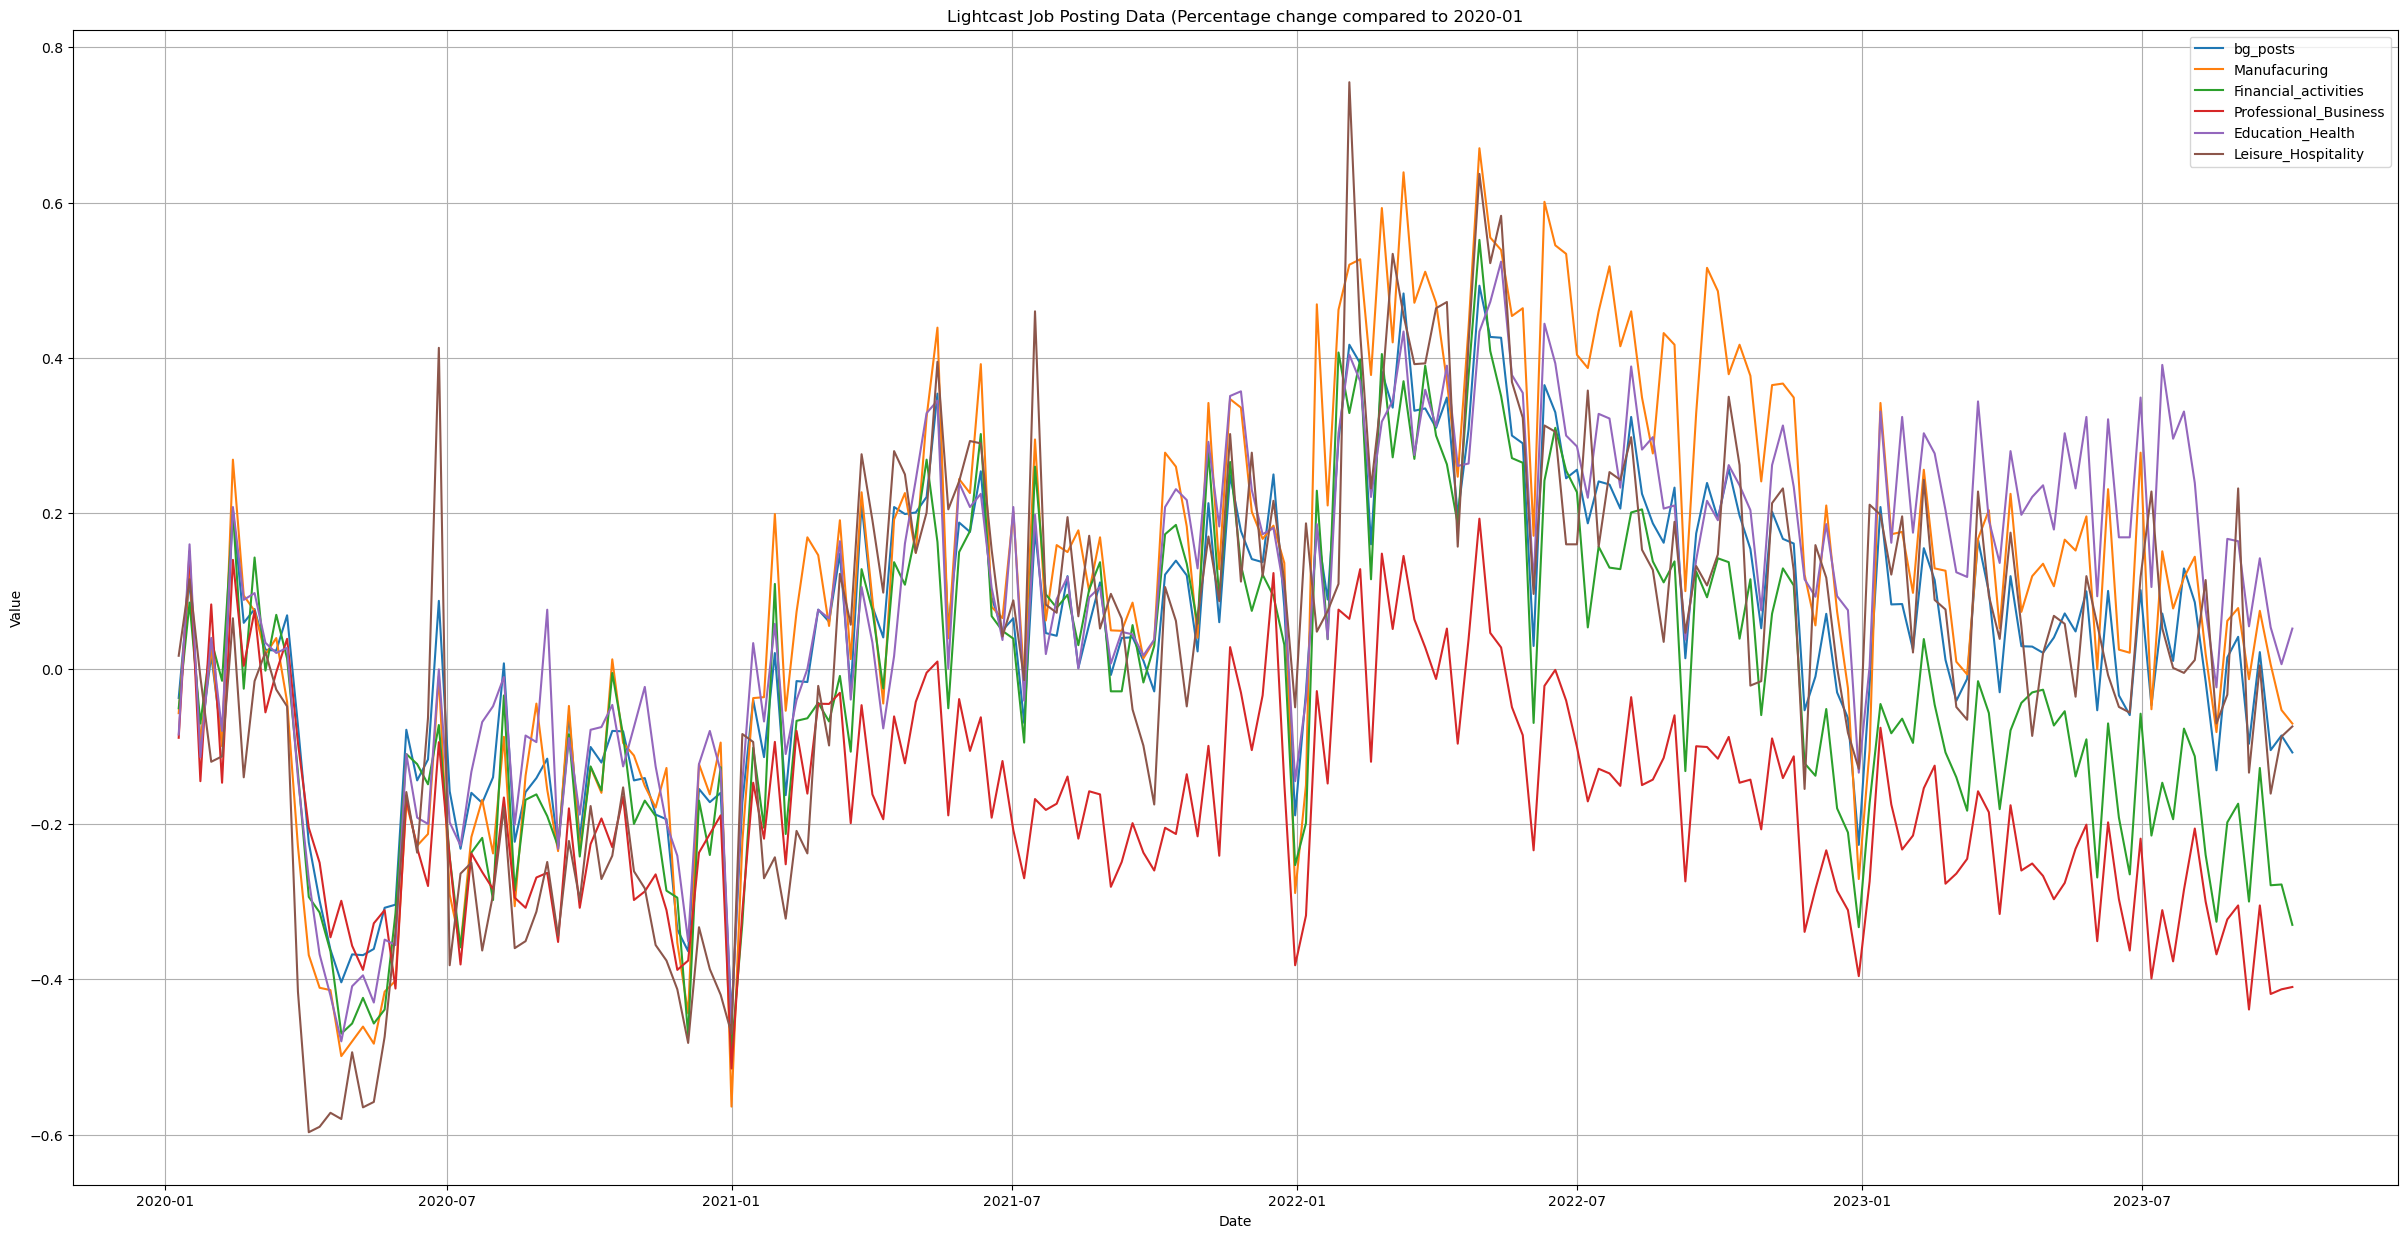

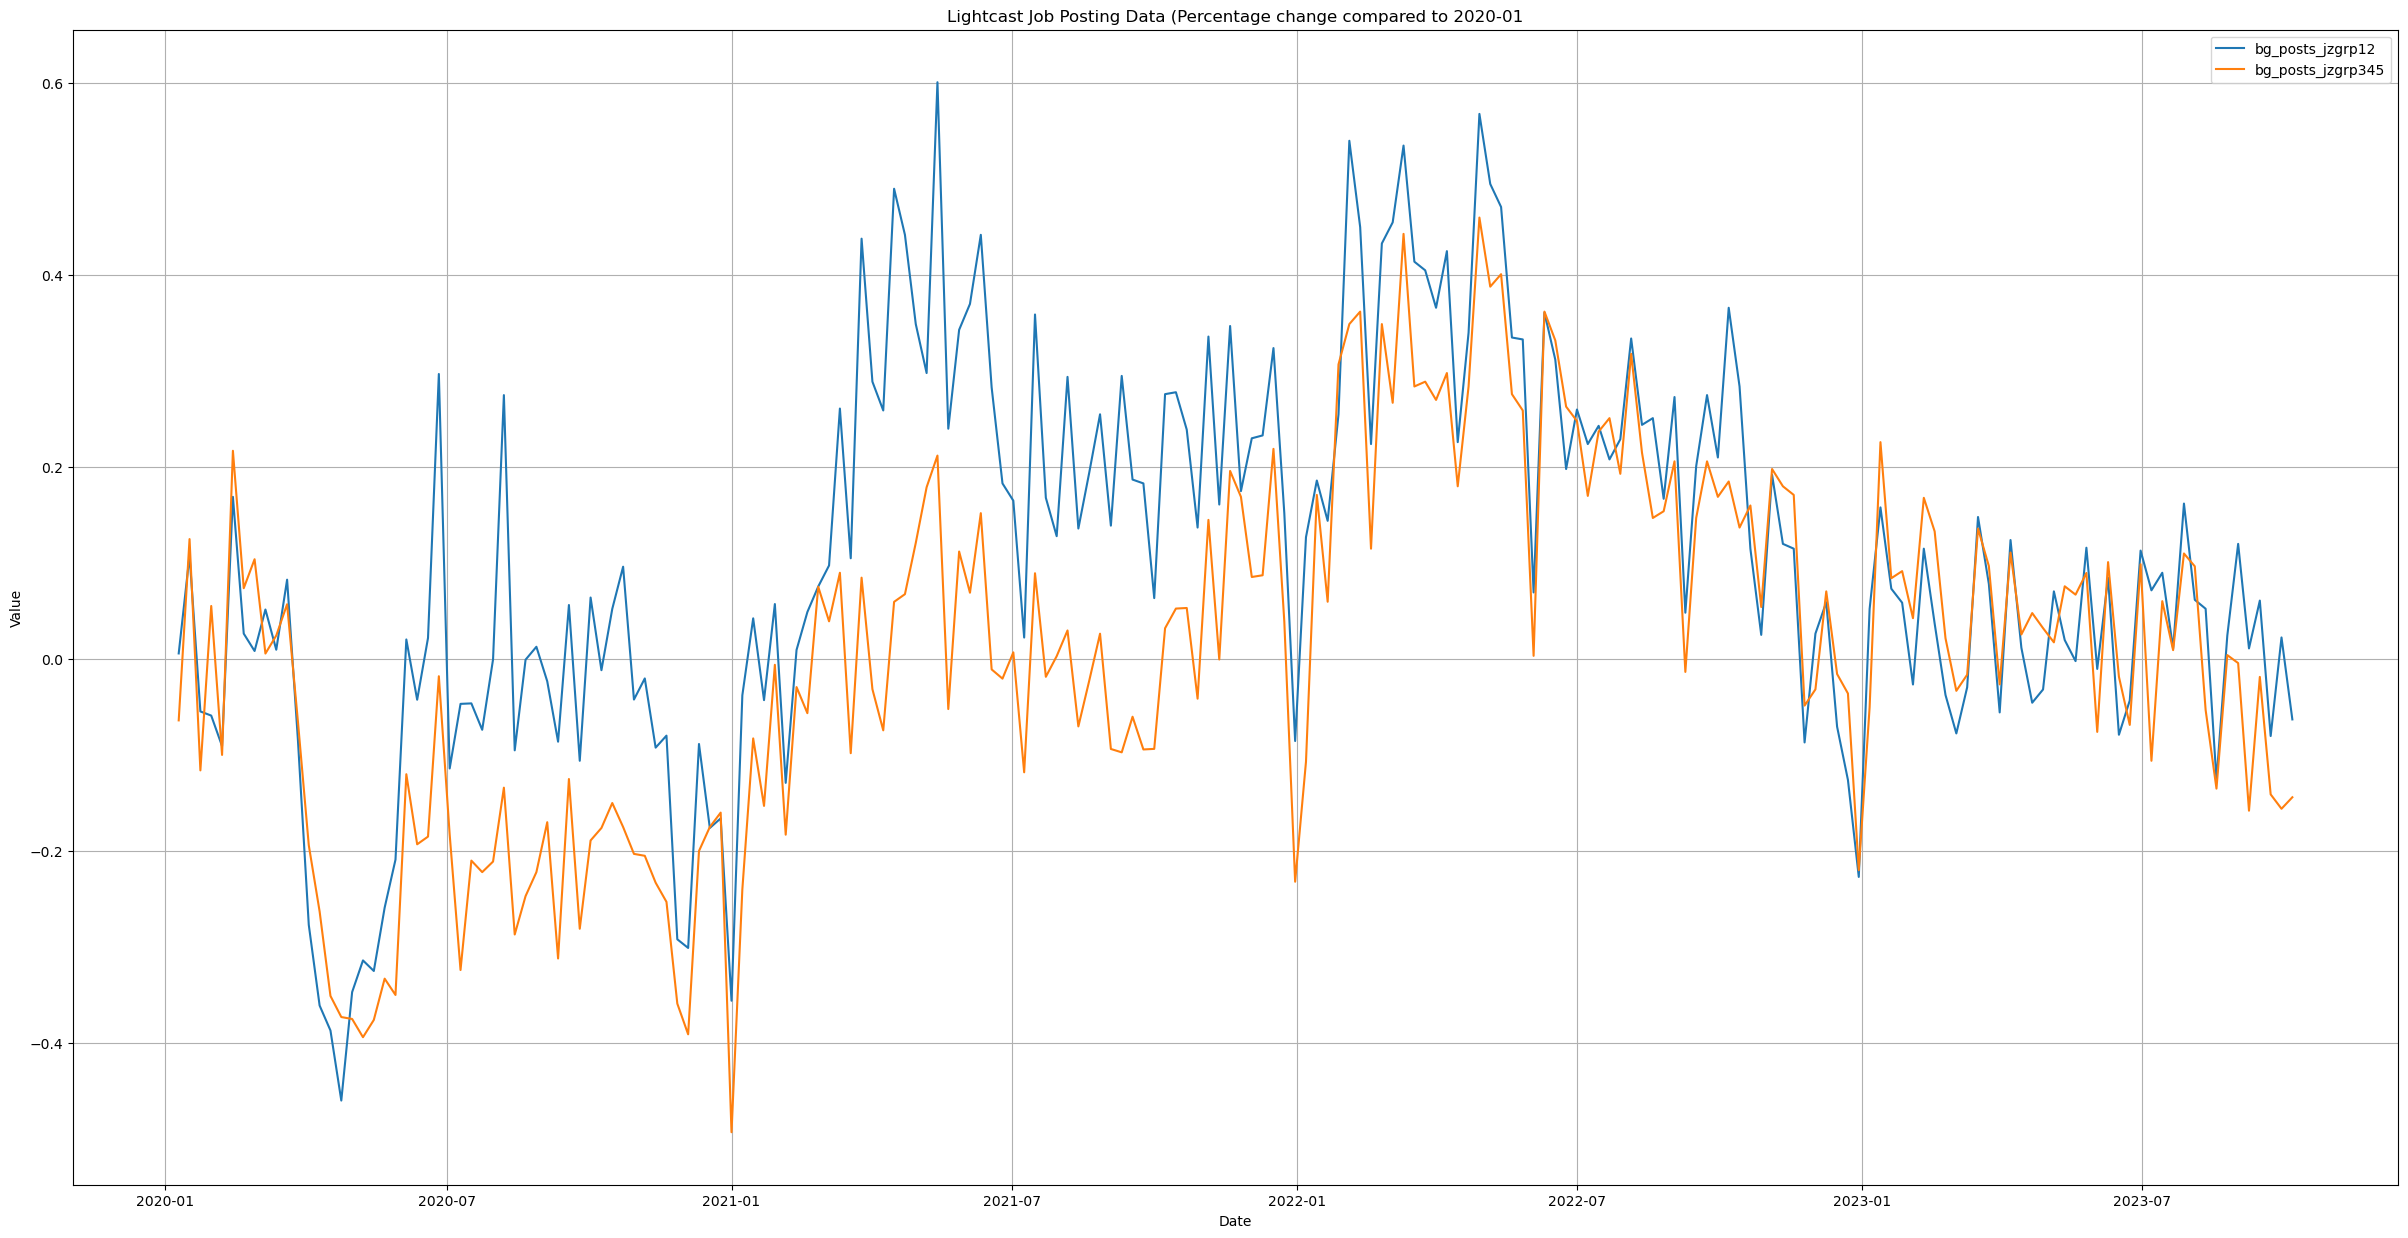

In [145]:
# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create multi-select dropdown
available_metrics = [col for col in df_jp_cleaned.columns]
metric_multi_select = widgets.SelectMultiple(options=available_metrics, description='Metrics:', disabled=False)

# Create a button to save the plot
save_button = widgets.Button(description="Save Plot")

# Define plotting function for multiple metrics
def plot_time_series(metrics):
    plt.figure(figsize=(30, 15))
    for metric in metrics:
        plt.plot(df_jp_cleaned.index, df_jp_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Lightcast Job Posting Data (Percentage change compared to 2020-01)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to handle button click
def save_plot(b):
    plt.figure(figsize=(30, 15))
    for metric in metric_multi_select.value:
        plt.plot(df_jp_cleaned.index, df_jp_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Lightcast Job Posting Data (Percentage change compared to 2020-01')
    plt.legend()
    plt.grid(True)
    plt.savefig('time_series_plot.png')

# Bind the button click event to the save function
save_button.on_click(save_plot)

# Interactive plotting
interactive_plot = interactive(plot_time_series, metrics=metric_multi_select)
output = interactive_plot.children[-1]
output.layout.height = '600'

# Combine interactive plot and button into a layout
layout = VBox([interactive_plot, save_button])
layout


### Paychex&Intuit

#### Data representation
- Weekly data 

#### Manipulation required:
- Change date representation
- Make Date as index
- Convert object to float
- Rename certain column names

#### Goals: 
- Understand total employment level
- Understand employment level from different income
- Understand employment level from differnt industries

In [154]:
#Paychex and Intuit employemnt data
df_emp = pd.read_csv('data/Employment - National - Weekly.csv')

In [158]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   emp                       187 non-null    float64       
 1   emp_incq1                 187 non-null    float64       
 2   emp_incq2                 187 non-null    float64       
 3   emp_incq3                 187 non-null    float64       
 4   emp_incq4                 187 non-null    object        
 5   emp_incmiddle             187 non-null    float64       
 6   emp_incbelowmed           187 non-null    float64       
 7   emp_incabovemed           187 non-null    object        
 8   emp_subset_unweighted_q1  187 non-null    float64       
 9   emp_subset_unweighted_q2  187 non-null    float64       
 10  emp_subset_unweighted_q3  187 non-null    float64       
 11  emp_subset_unweighted_q4  187 non-null    object        
 12  emp_subset_reweighted_

In [156]:
# Assuming df_jp is your DataFrame with 'year', 'month', and 'day_endofweek' columns
df_emp = df_emp.rename(columns={'day_endofweek': 'day'})  # Rename the column to 'day'
df_emp['Date'] = pd.to_datetime(df_emp[['year', 'month', 'day']])

# Drop the original 'year', 'month', and 'day' columns if needed
df_emp = df_emp.drop(['year', 'month', 'day'], axis=1)

# Reset the index
df_emp_cleaned = df_emp.reset_index(drop=True)

# Convert the 'Date' column to datetime objects and set it as the index using .loc[]
df_emp_cleaned.loc[:, 'Date'] = pd.to_datetime(df_emp_cleaned['Date'])
df_emp_cleaned.set_index('Date', inplace=True)


In [159]:
# Convert 'object' columns to numeric, replacing non-numeric values with NaN
object_columns = df_emp_cleaned.select_dtypes(include=['object']).columns
df_emp_cleaned[object_columns] = df_emp_cleaned[object_columns].apply(pd.to_numeric, errors='coerce')

In [166]:
def customize_column_names(df, column_mapping):
    """
    Customize column names in a DataFrame.

    Parameters:
    - df: DataFrame to be modified.
    - column_mapping: A dictionary that maps current column names to new names.

    Returns:
    - df with customized column names.
    """
    # Rename columns using the provided mapping
    df.rename(columns=column_mapping, inplace=True)

    return df

# Define a column name mapping
#column_mapping = {'A': 'Column1', 'B': 'Column2', 'C': 'Column3'}
column_mapping = {'emp_retail': 'Retail', 'emp_s72': 'Accomodation_Food', 'emp_ss70': 'Leisure_Hospitality', 'emp_ss65': 'Education_Health', 'emp_ss60': 'Professional_Business', 'emp_ss40': 'Trade_Transportation_Utilities'}

# Call the customize_column_names function
df_emp_cleaned = customize_column_names(df_emp_cleaned, column_mapping)


In [170]:
df_emp_cleaned.to_csv('Paychex_Intuit_cleaned.csv')

#### Data Visualization & Analysis

In [169]:
# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create multi-select dropdown
available_metrics = [col for col in df_emp_cleaned.columns]
metric_multi_select = widgets.SelectMultiple(options=available_metrics, description='Metrics:', disabled=False)

# Create a button to save the plot
save_button = widgets.Button(description="Save Plot")

# Define plotting function for multiple metrics
def plot_time_series(metrics):
    plt.figure(figsize=(30, 15))
    for metric in metrics:
        plt.plot(df_emp_cleaned.index, df_emp_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Paychex&Intuit Employment Level Data (Percentage change compared to 2020-01)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to handle button click
def save_plot(b):
    plt.figure(figsize=(30, 15))
    for metric in metric_multi_select.value:
        plt.plot(df_emp_cleaned.index, df_emp_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Paychex&Intuit Employment Level Data (Percentage change compared to 2020-01')
    plt.legend()
    plt.grid(True)
    plt.savefig('time_series_plot.png')

# Bind the button click event to the save function
save_button.on_click(save_plot)

# Interactive plotting
interactive_plot = interactive(plot_time_series, metrics=metric_multi_select)
output = interactive_plot.children[-1]
output.layout.height = '600'

# Combine interactive plot and button into a layout
layout = VBox([interactive_plot, save_button])
layout


### Womply

#### Data representation
- Weekly data 

#### Manipulation required:
- Change date representation
- Make Date as index

#### Goals: 
- Understand total revenue change for small businesses
    - Also for different industries
- Understand total open number change for small businesses
    - Also for different industries

In [ ]:
#Womply small business revenue and open data
df_sbiz = pd.read_csv('data/Womply - National - Weekly.csv')

In [176]:
df_sbiz_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2020-01-12 to 2022-02-06
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   merchants_all                 109 non-null    float64
 1   revenue_all                   109 non-null    float64
 2   merchants_professional        109 non-null    float64
 3   revenue_professional          109 non-null    float64
 4   merchants_health              109 non-null    float64
 5   revenue_health                109 non-null    float64
 6   merchants_food_accommodation  109 non-null    float64
 7   revenue_food_accommodation    109 non-null    float64
 8   merchants_other_services      109 non-null    float64
 9   revenue_other_services        109 non-null    float64
 10  merchants_retail              109 non-null    float64
 11  revenue_retail                109 non-null    float64
 12  revenue_inclow                109 non-null   

In [173]:
# Assuming df_jp is your DataFrame with 'year', 'month', and 'day_endofweek' columns
df_sbiz = df_sbiz.rename(columns={'day_endofweek': 'day'})  # Rename the column to 'day'
df_sbiz['Date'] = pd.to_datetime(df_sbiz[['year', 'month', 'day']])

# Drop the original 'year', 'month', and 'day' columns if needed
df_sbiz = df_sbiz.drop(['year', 'month', 'day'], axis=1)

# Reset the index
df_sbiz_cleaned = df_sbiz.reset_index(drop=True)

# Convert the 'Date' column to datetime objects and set it as the index using .loc[]
df_sbiz_cleaned.loc[:, 'Date'] = pd.to_datetime(df_sbiz_cleaned['Date'])
df_sbiz_cleaned.set_index('Date', inplace=True)


In [179]:
df_sbiz_cleaned.to_csv('Womply_cleaned.csv')

#### Data Visualization & Analysis

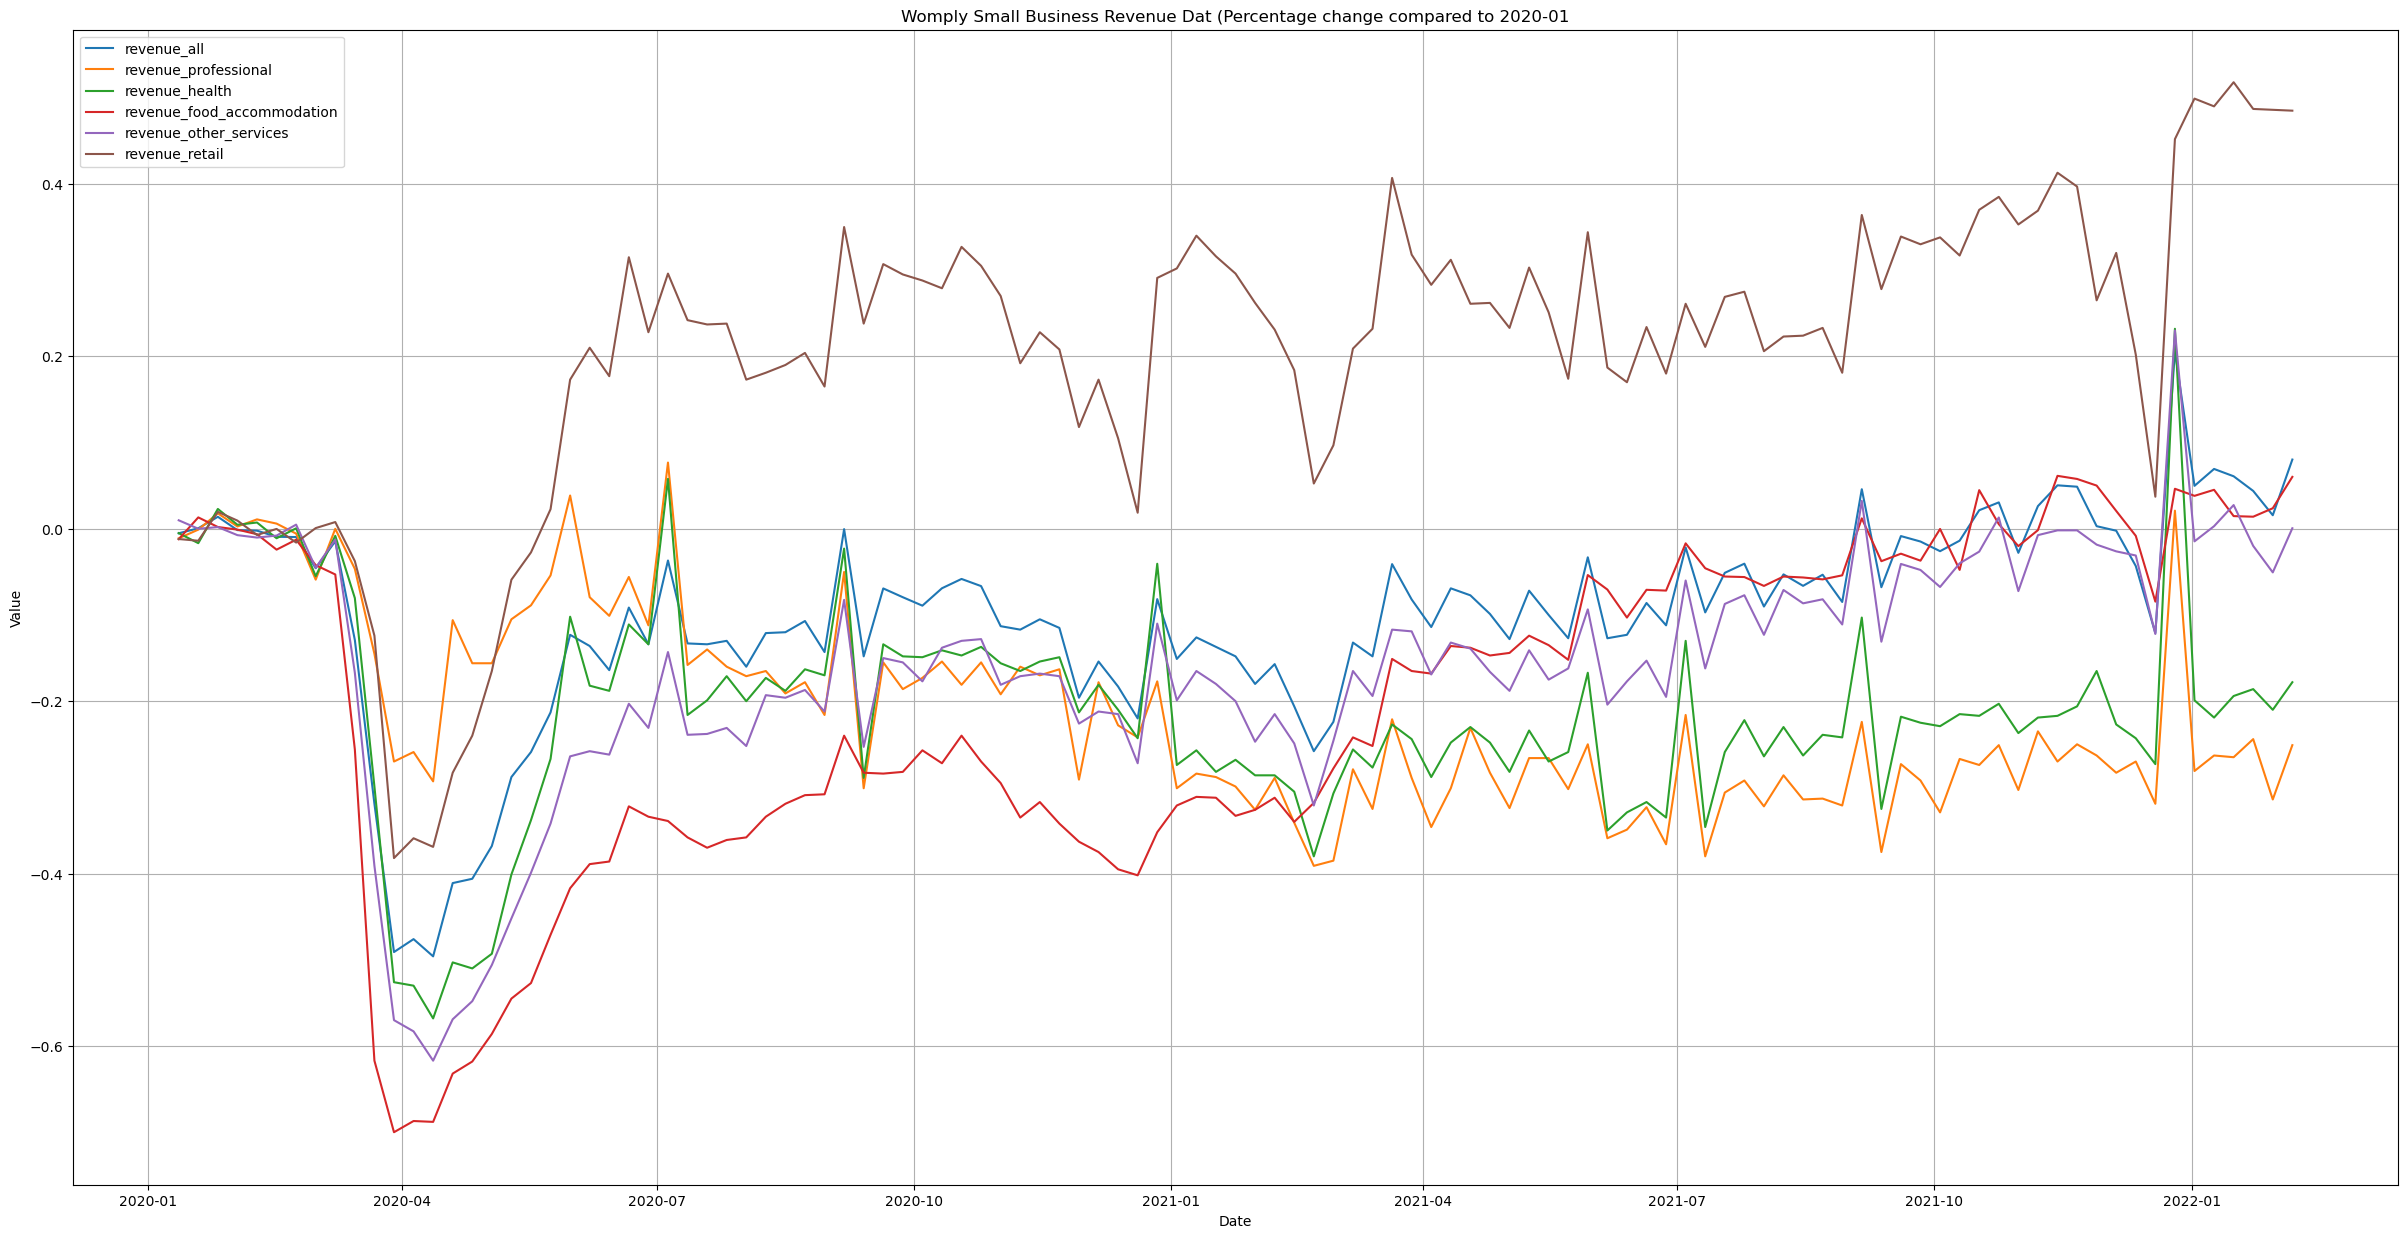

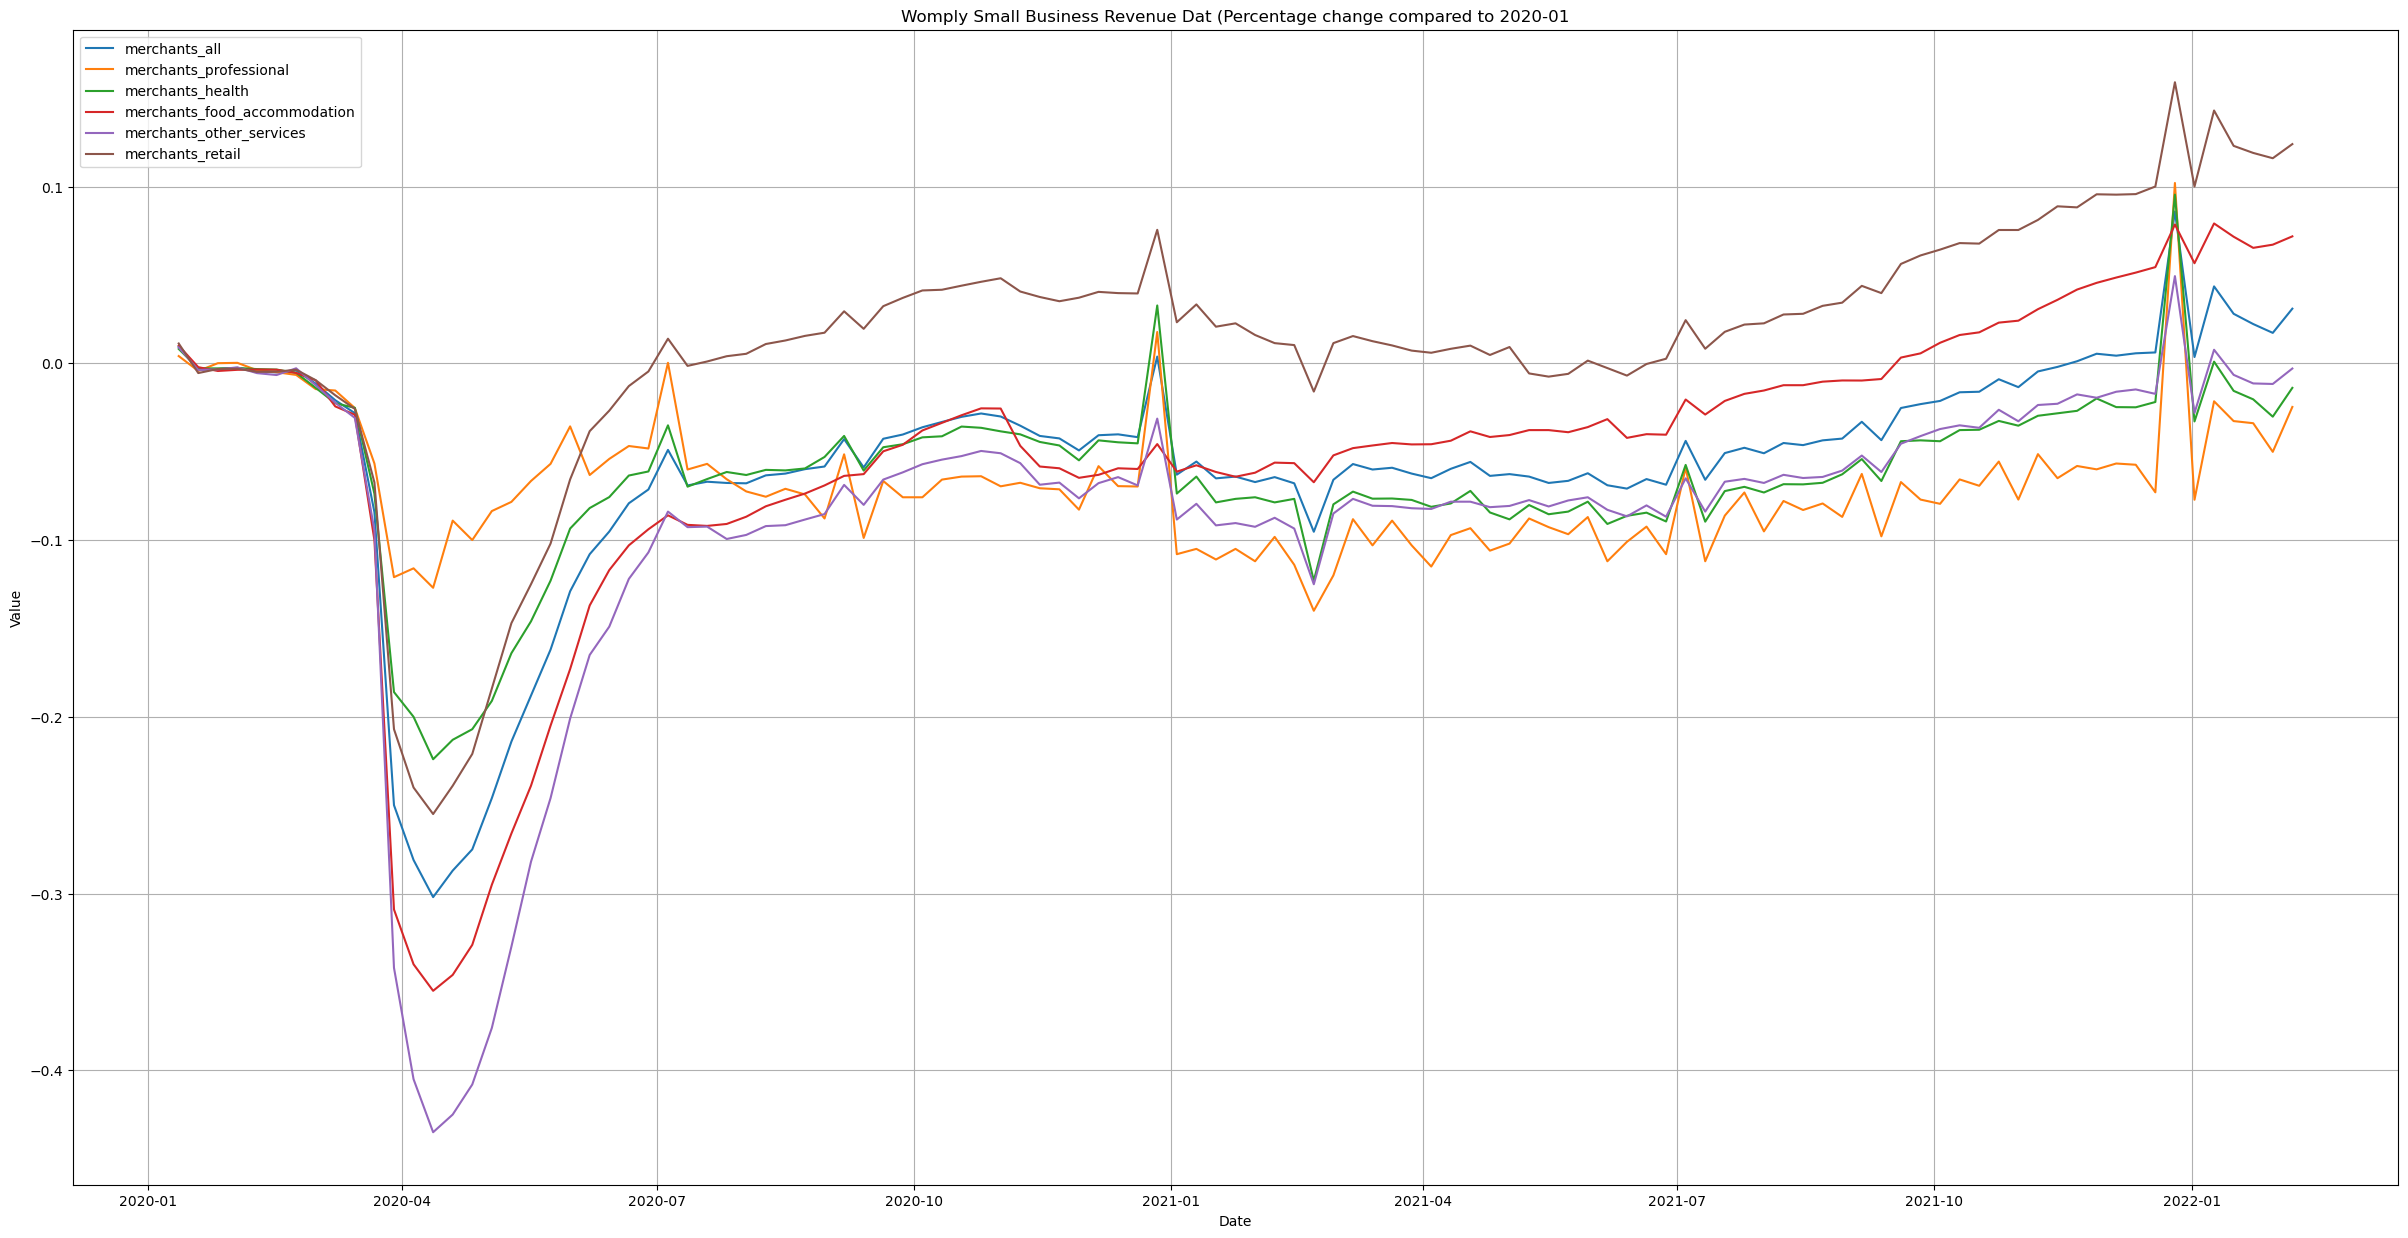

In [178]:
# Assuming df_af_cleaned is your DataFrame and 'Date' is already the index in datetime format

# Create multi-select dropdown
available_metrics = [col for col in df_sbiz_cleaned.columns]
metric_multi_select = widgets.SelectMultiple(options=available_metrics, description='Metrics:', disabled=False)

# Create a button to save the plot
save_button = widgets.Button(description="Save Plot")

# Define plotting function for multiple metrics
def plot_time_series(metrics):
    plt.figure(figsize=(30, 15))
    for metric in metrics:
        plt.plot(df_sbiz_cleaned.index, df_sbiz_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Womply Small Business Revenue Data (Percentage change compared to 2020-01)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to handle button click
def save_plot(b):
    plt.figure(figsize=(30, 15))
    for metric in metric_multi_select.value:
        plt.plot(df_sbiz_cleaned.index, df_sbiz_cleaned[metric], label=metric)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Womply Small Business Revenue Dat (Percentage change compared to 2020-01')
    plt.legend()
    plt.grid(True)
    plt.savefig('time_series_plot.png')

# Bind the button click event to the save function
save_button.on_click(save_plot)

# Interactive plotting
interactive_plot = interactive(plot_time_series, metrics=metric_multi_select)
output = interactive_plot.children[-1]
output.layout.height = '600'

# Combine interactive plot and button into a layout
layout = VBox([interactive_plot, save_button])
layout


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2020-01-12 to 2022-02-06
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   merchants_all                 109 non-null    float64
 1   revenue_all                   109 non-null    float64
 2   merchants_professional        109 non-null    float64
 3   revenue_professional          109 non-null    float64
 4   merchants_health              109 non-null    float64
 5   revenue_health                109 non-null    float64
 6   merchants_food_accommodation  109 non-null    float64
 7   revenue_food_accommodation    109 non-null    float64
 8   merchants_other_services      109 non-null    float64
 9   revenue_other_services        109 non-null    float64
 10  merchants_retail              109 non-null    float64
 11  revenue_retail                109 non-null    float64
 12  revenue_inclow                109 non-null   

In [46]:
#Choosing the columns we need
df_sbiz_adj = df_sbiz[['year', 'month', 'merchants_all', 'revenue_all']]
df_sbiz_adj.head(20)

,year,month,merchants_all,revenue_all
0,2020,1,0.00934,-0.005230
1,2020,1,-0.00367,0.000584
2,2020,1,-0.00330,0.013900
3,2020,2,-0.00259,-0.001570
4,2020,2,-0.00444,-0.002180
5,2020,2,-0.00514,-0.009290
6,2020,2,-0.00403,-0.009600
7,2020,3,-0.01150,-0.045700
8,2020,3,-0.02090,-0.014500
9,2020,3,-0.02820,-0.129000


### Department of labor

In [15]:
#Unemployment cliams data
df_uemc = pd.read_csv('data/UI Claims - National - Weekly.csv')
df_uemc.head(20)

,year,month,day_endofweek,initclaims_count_regular,contclaims_count_regular,initclaims_count_pua,contclaims_count_peuc,contclaims_count_pua,initclaims_count_combined,contclaims_count_combined,initclaims_rate_regular,contclaims_rate_regular,initclaims_rate_pua,contclaims_rate_peuc,contclaims_rate_pua,initclaims_rate_combined,contclaims_rate_combined
0,2020,1,4,333862,2124746,0,0,0,333862,2124746,0.205,1.30,0,0,0,.205,1.3
1,2020,1,11,336451,2231589,0,0,0,336451,2231589,0.206,1.37,0,0,0,.206,1.37
2,2020,1,18,277748,2116200,0,0,0,277748,2116200,0.170,1.30,0,0,0,.17,1.3
3,2020,1,25,225390,2055963,0,0,0,225390,2055963,0.138,1.26,0,0,0,.138,1.26
4,2020,2,1,222049,2126523,0,0,0,222049,2126523,0.136,1.30,0,0,0,.136,1.3
5,2020,2,8,217127,2061719,0,0,0,217127,2061719,0.133,1.26,0,0,0,.133,1.26
6,2020,2,15,207101,2074809,0,0,0,207101,2074809,0.127,1.27,0,0,0,.127,1.27
7,2020,2,22,197034,2037237,0,0,0,197034,2037237,0.121,1.25,0,0,0,.121,1.25
8,2020,2,29,214913,2079767,0,0,0,214913,2079767,0.132,1.28,0,0,0,.132,1.28
9,2020,3,7,198167,2033416,0,0,0,198167,2033416,0.122,1.25,0,0,0,.122,1.25


In [47]:
#Choosing the columns we need
df_uemc_adj = df_uemc[['year', 'month', 'initclaims_count_regular', 'contclaims_count_regular']]
df_uemc_adj.head(20)

,year,month,initclaims_count_regular,contclaims_count_regular
0,2020,1,333862,2124746
1,2020,1,336451,2231589
2,2020,1,277748,2116200
3,2020,1,225390,2055963
4,2020,2,222049,2126523
5,2020,2,217127,2061719
6,2020,2,207101,2074809
7,2020,2,197034,2037237
8,2020,2,214913,2079767
9,2020,3,198167,2033416


In [9]:
df_af.describe()

,year,month,day,provisional
count,1322.000000,1322.000000,1322.000000,1322.000000
mean,2020.369138,6.134644,15.680787,0.002269
std,1.118918,3.447896,8.823412,0.047601
min,2018.000000,1.000000,1.000000,0.000000
25%,2019.000000,3.000000,8.000000,0.000000
50%,2020.000000,6.000000,16.000000,0.000000
75%,2021.000000,9.000000,23.000000,0.000000
max,2023.000000,12.000000,31.000000,1.000000


In [3]:
# Example: Load CSV files into a list of DataFrames
file_paths = ['data/Affinity - National - Daily.csv', 
'data/Employment - State - Weekly.csv', 
'data/Job Postings - National - Weekly.csv', 
'data/UI Claims - National - Weekly.csv', 
'data/Womply - National - Weekly.csv'] 

dataframes = [pd.read_csv(file) for file in file_paths]